In [108]:
import numpy as np
import matplotlib.pyplot as plt
import collections

## *simulator for single qubit operations*
---
This block of code is just to represent simulator for single qubit operations and it doesnot perform any multiple qubit operations.

In [10]:
class QCircuit:
    ''' 
        initializing gates
        limiting number of gates for better understanding.
    '''
    pauli_x=np.array([[0,1],
                      [1,0]])
    pauli_y=np.array([[0,-1j],
                      [1j,0]])
    pauli_z=np.array([[1,0],
                      [0,-1]])
    hadamard=np.array([[1,1],
                       [1,-1]])
    identity=np.identity(2)
    __gates={'x':pauli_x,'y':pauli_y,'z':pauli_z,'h':hadamard,'i':identity}
    def __init__(self,n:int) -> None:
        '''number of qubits'''
        try:
            assert(n>0)
        except AssertionError:
            print('number of qubits must be greater than zero')
        else:
            self.n=n
            self.all_statevectors=[[1,0]]*self.n
            gate_operations=[]
            self.gate_operations=gate_operations
    def __perform_gate(self,statevector:np.array,gate:np.array)->np.array:
        new_statevector=np.dot(gate,statevector)
        norm=np.sqrt((new_statevector[0]**2)+ (new_statevector[1]**2))
        statevector= new_statevector/norm
        return statevector
    
    def x(self,index:int)->None:
        self.gate_operations.append(('x',index))
    def y(self,index:int)->None:
        self.gate_operations.append(('y',index))
    def z(self,index:int)->None:
        self.gate_operations.append(('z',index))
    def h(self,index:int)->None:
        self.gate_operations.append(('h',index))
    
    def measure(self,iters=1)->None:
        '''
            args:

            iters: number of iterations

            output:
                returns Count of circuit
                
        '''


        for step in self.gate_operations:
            # print(step)
            gate_rep,index=step[0],step[1]
            statevector=self.__perform_gate(self.all_statevectors[index],self.__gates[gate_rep])
            self.all_statevectors[index]=statevector
        final_statevector=self.all_statevectors[0]
        for i in range(1,len(self.all_statevectors)):
            final_statevector=np.kron(final_statevector,self.all_statevectors[i])

        #normalizing final statevector

        norm=np.linalg.norm(final_statevector)
        final_statevector=final_statevector/norm

        # print(f'Statevector= {final_statevector} \n')

        probobalities=np.abs(final_statevector)**2
        count=[]
        for i in range(iters):
            val=np.random.choice(len(final_statevector),p=probobalities)
            val=bin(val)[2:].zfill(self.n)
            count.append(val)
        counts=collections.Counter(count)
        counts=counts.most_common()
        return dict(counts)




## *visualize counts*
---
visualizing counts of the circuit

In [34]:
def visualize_counts(counts:dict,color='red')->None:
    '''
        color argument is optional
    '''
    plt.bar(list(counts.keys()),list(counts.values()),align='center',width=0.3,color=color)
    plt.xticks(list(counts.keys()))
    plt.xlabel('measurements')
    plt.ylabel('counts')
    plt.title('histogram for counts')
    plt.show()

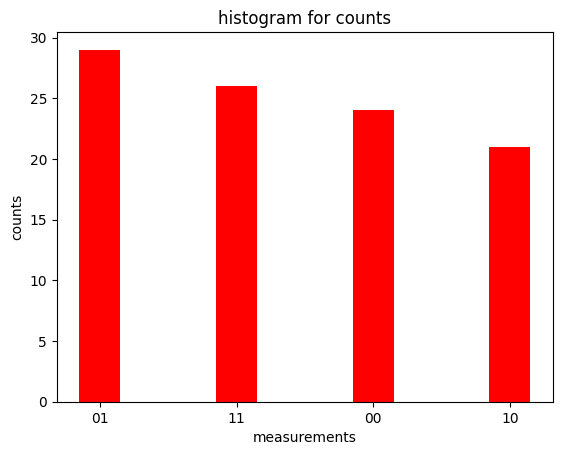

In [35]:
qc=QCircuit(2)
qc.h(0)
qc.h(1)
k=qc.measure(100)
visualize_counts(k)